<div style="border-radius: 15px; box-shadow: 2px 2px 4px; border: 1px solid; background:#bdc3c7; padding: 20px"> <h7 style="color:black; margin-bottom:20px"> Антон, привет!) Это Михаил.

Мои комментарии и замечания далее по тексту помечены различными цветами:
    
---    
<div class="alert alert-block alert-danger">
❌ : Критическое замечание, которые следует исправить.
</div> 
    
---
    
<div class="alert alert-block alert-warning">
⚠️ : Замечание\совет на будущее.
</div>
    
---
    
<div class="alert alert-block alert-success">
✔️ : Когда всё сделано правильно.
</div>
    
---
    
p.s.: не удаляй мои замечания, если предстоит что то доработать в проекте.</h7>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " > <b>Комментарии от ревьюера ❌ : </b> 

Итог ревью - ты проделал хорошую работу. Почти все запросы корректные и дают правильный результат. Но есть одно задание, которое тебе предстоит доработать, чтобы я смог принять твой проект. Если возникнут вопросы по моим комментариям, пиши здесь - обязательно отвечу. Буду ждать!
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " > <b>Комментарии от ревьюера v2 ✔️ : </b> 

Привет! Все замечания учтены) Поздравляю с завершением финального спринта!
    
Остается дождаться общего созвона в ближайшее время)
</div>

Коронавирус застал мир врасплох, изменив привычный порядок вещей. В свободное время жители городов больше не выходят на улицу, не посещают кафе и торговые центры. Зато стало больше времени для книг. Это заметили стартаперы — и бросились создавать приложения для тех, кто любит читать.

Ваша компания решила быть на волне и купила крупный сервис для чтения книг по подписке. Ваша первая задача как аналитика — проанализировать базу данных.
В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

# Описание данных

**Таблица `books`**

Содержит данные о книгах:

- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

**Таблица `authors`**

Содержит данные об авторах:

- `author_id` — идентификатор автора;
- `author` — имя автора.

**Таблица `publishers`**

Содержит данные об издательствах:

- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства;

**Таблица `ratings`**

Содержит данные о пользовательских оценках книг:

- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

**Таблица `reviews`**

Содержит данные о пользовательских обзорах на книги:

- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, написавшего обзор;
- `text` — текст обзора.

# ER

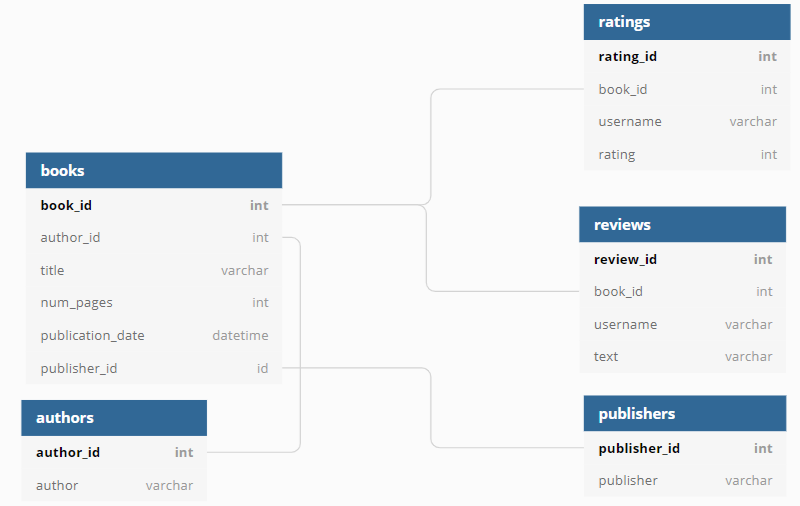

# Задачи

- Посчитайте, сколько книг вышло после 1 января 2000 года;
- Для каждой книги посчитайте количество обзоров и среднюю оценку;
- Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;
- Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;
- Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

# Импорт библиотек

In [1]:
import pandas as pd
from sqlalchemy import create_engine

# Подключение

In [2]:
# параметры подлючения
db_config = {'user': 'praktikum_student', # имя пользователя
 'pwd': 'Sdf4$2;d-d30pp', # пароль
 'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
 'port': 6432, # порт подключения
 'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
 db_config['pwd'],
 db_config['host'],
 db_config['port'],
 db_config['db'])
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

In [3]:
# чтобы не писать каждый раз запрос, создадим функцию
def select(query):
    return pd.io.sql.read_sql(query, con = engine) 

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " > <b>Комментарии от ревьюера ❌ : </b> 

<s>А как же посмотреть выгруженные данные? Все ли там корректно. В реальной практике всегда первым делом проверяют данные, а потом уже проводят анализ. Добавь этот пункт пожалуйста
</div>

<div class = "alert alert-info" >   
    
<b>Комментарий студента</b>  
    done ✔
</div>

## Изучение данных

In [4]:
# функция для ознакомления с данными
def dataframeinfo(df):
    display(df.head(5))
    print('-' * 100, '\n**Типы данных**')
    print(df.info())
    print('-' * 100, '\n**Кол-во пропусков**')
    print(df.isna().sum())
    print('-' * 100,
          '\n**Кол-во дубликатов** {}'.format(df.duplicated().sum()))
    print('-' * 100, '\n**Статистические данные**')
    display(df.describe())

authors

In [5]:
authors = '''
SELECT *
FROM authors
'''
dataframeinfo(select(authors))

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


---------------------------------------------------------------------------------------------------- 
**Типы данных**
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
author_id    636 non-null int64
author       636 non-null object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB
None
---------------------------------------------------------------------------------------------------- 
**Кол-во пропусков**
author_id    0
author       0
dtype: int64
---------------------------------------------------------------------------------------------------- 
**Кол-во дубликатов** 0
---------------------------------------------------------------------------------------------------- 
**Статистические данные**


,author_id
count,636.000000
mean,318.500000
std,183.741666
min,1.000000
25%,159.750000
50%,318.500000
75%,477.250000
max,636.000000


всего 636 авторов.

books

In [6]:
books = '''
SELECT *
FROM books
'''
dataframeinfo(select(books))

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


---------------------------------------------------------------------------------------------------- 
**Типы данных**
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
book_id             1000 non-null int64
author_id           1000 non-null int64
title               1000 non-null object
num_pages           1000 non-null int64
publication_date    1000 non-null object
publisher_id        1000 non-null int64
dtypes: int64(4), object(2)
memory usage: 47.0+ KB
None
---------------------------------------------------------------------------------------------------- 
**Кол-во пропусков**
book_id             0
author_id           0
title               0
num_pages           0
publication_date    0
publisher_id        0
dtype: int64
---------------------------------------------------------------------------------------------------- 
**Кол-во дубликатов** 0
-------------------------------------------------------------------------------------

,book_id,author_id,num_pages,publisher_id
count,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,320.417000,389.11100,171.270000
std,288.819436,181.620172,229.39014,99.082685
min,1.000000,1.000000,14.00000,1.000000
25%,250.750000,162.750000,249.00000,83.000000
50%,500.500000,316.500000,352.00000,177.500000
75%,750.250000,481.000000,453.00000,258.000000
max,1000.000000,636.000000,2690.00000,340.000000


1000 книг. Среднее кол-во страниц: 389. мин.кол-во страниц: 14. макс.кол-во страниц: 2690. Медианное кол-во страниц: 352.

ratings

In [7]:
ratings = '''
SELECT *
FROM ratings
'''
dataframeinfo(select(ratings))

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


---------------------------------------------------------------------------------------------------- 
**Типы данных**
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
rating_id    6456 non-null int64
book_id      6456 non-null int64
username     6456 non-null object
rating       6456 non-null int64
dtypes: int64(3), object(1)
memory usage: 201.9+ KB
None
---------------------------------------------------------------------------------------------------- 
**Кол-во пропусков**
rating_id    0
book_id      0
username     0
rating       0
dtype: int64
---------------------------------------------------------------------------------------------------- 
**Кол-во дубликатов** 0
---------------------------------------------------------------------------------------------------- 
**Статистические данные**


,rating_id,book_id,rating
count,6456.000000,6456.000000,6456.000000
mean,3228.500000,510.574195,3.928284
std,1863.831001,284.141636,0.943303
min,1.000000,1.000000,1.000000
25%,1614.750000,291.000000,3.000000
50%,3228.500000,506.000000,4.000000
75%,4842.250000,750.000000,5.000000
max,6456.000000,1000.000000,5.000000


Средний рейтинг: 3,92. Медианный 4. Всего указано рейтингов: 6456.

reviews

In [8]:
reviews = '''
SELECT *
FROM reviews
'''
dataframeinfo(select(reviews))

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


---------------------------------------------------------------------------------------------------- 
**Типы данных**
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
review_id    2793 non-null int64
book_id      2793 non-null int64
username     2793 non-null object
text         2793 non-null object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB
None
---------------------------------------------------------------------------------------------------- 
**Кол-во пропусков**
review_id    0
book_id      0
username     0
text         0
dtype: int64
---------------------------------------------------------------------------------------------------- 
**Кол-во дубликатов** 0
---------------------------------------------------------------------------------------------------- 
**Статистические данные**


,review_id,book_id
count,2793.000000,2793.000000
mean,1397.000000,504.693161
std,806.413976,288.472931
min,1.000000,1.000000
25%,699.000000,259.000000
50%,1397.000000,505.000000
75%,2095.000000,753.000000
max,2793.000000,1000.000000


Выполнено 2793 обзора.

publishers

In [9]:
publishers = '''
SELECT *
FROM publishers
'''
dataframeinfo(select(publishers))

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


---------------------------------------------------------------------------------------------------- 
**Типы данных**
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
publisher_id    340 non-null int64
publisher       340 non-null object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB
None
---------------------------------------------------------------------------------------------------- 
**Кол-во пропусков**
publisher_id    0
publisher       0
dtype: int64
---------------------------------------------------------------------------------------------------- 
**Кол-во дубликатов** 0
---------------------------------------------------------------------------------------------------- 
**Статистические данные**


,publisher_id
count,340.000000
mean,170.500000
std,98.293777
min,1.000000
25%,85.750000
50%,170.500000
75%,255.250000
max,340.000000


**Вывод:** отсутсвуют пропущенные значения, типы данных указаны правильно.

 - всего 636 авторов;
 - 1000 книг. Среднее кол-во страниц: 389. мин.кол-во страниц: 14. макс.кол-во страниц: 2690. Медианное кол-во страниц: 352;
 - средний рейтинг: 3,92. Медианный 4. Всего указано рейтингов: 6456;
 - выполнено 2793 обзора;
 - представлено 360 издательств.

# Решение задач
## Кол-во выпущенных книг после 1 января 2000 года

In [10]:
books_count = ''' 
SELECT COUNT(book_id)
FROM books
WHERE publication_date >= '2000-01-02'
'''
select(books_count)

,count
0,819


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " > <b>Комментарии от ревьюера ✔️ : </b> 
    
Всё верно. Это правильный ответ

</div>

**Вывод:** после 01.01.2000 было выпущено 819 книг.

## Количество обзоров и средняя оценку для каждой книги

### Просмотр таблиц

In [11]:
review =  '''
SELECT *
from reviews
limit 5
'''
select(review)

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


In [12]:
ratings =  '''
SELECT *
from ratings
limit 5
'''
select(ratings)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


### Решение

In [20]:
books_rating = '''
SELECT
    books.book_id,
    books.title,
    COUNT(DISTINCT review_id) AS cnt_reviews,
    AVG(ratings.rating) AS avg_rating
FROM books
LEFT JOIN reviews ON books.book_id = reviews.book_id
JOIN ratings ON books.book_id = ratings.book_id
GROUP BY
    books.book_id
ORDER BY
     cnt_reviews ASC
LIMIT 5
'''
select(books_rating)

,book_id,title,cnt_reviews,avg_rating
0,221,Essential Tales and Poems,0,4.000000
1,387,Leonardo's Notebooks,0,4.000000
2,83,Anne Rice's The Vampire Lestat: A Graphic Novel,0,3.666667
3,191,Disney's Beauty and the Beast (A Little Golden...,0,4.000000
4,672,The Cat in the Hat and Other Dr. Seuss Favorites,0,5.000000


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " > <b>Комментарии от ревьюера ❌ : </b> 
    
<s>Почти то что надо, но ты вывел только те книги, у которых есть текстовые отзывы reviews, а ведь у книг без отзывов оценки то никуда не делись и их по задаче необходимо вывести. Доработай этот момент пожалуйста

</div>

<div class = "alert alert-info" >   
    
<b>Комментарий студента</b>  
    Доработал запрос и отсортировал книги по количеству отзывов.
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " > <b>Комментарии от ревьюера v2 ✔️ : </b> 

Отлично. Теперь всё верно)
</div>

**Вывод:** есть книги с количеством обзоров равным 1, всего их 37. Книги с оценкой 5, имеют всего 1-2 обзора.

## Определить издательство, которое выпустило наибольшее число книг толще 50 страниц

In [14]:
books_pub = '''
SELECT 
    publishers.publisher AS publisher,
    count(book_id) AS cnt_book
FROM 
    books
JOIN publishers 
    on books.publisher_id = publishers.publisher_id
where 
    num_pages > 50
GROUP BY 
    publisher
ORDER BY cnt_book DESC
LIMIT 5
'''
select(books_pub)

,publisher,cnt_book
0,Penguin Books,42
1,Vintage,31
2,Grand Central Publishing,25
3,Penguin Classics,24
4,Bantam,19


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " > <b>Комментарии от ревьюера ✔️ : </b> 
    

Согласен с результатом. Действительно данное издательство является лидером по выпущенным книгам

</div>

**Вывод:** "Penguin Books" - выпустило больше всех книг, в которых более 50 страниц.

## Определить автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками

In [15]:
top_authors =  '''
SELECT 
    SUBQ.author,
    AVG(SUBQ.avg_rating) as avg_rating
FROM
(
SELECT 
    books.book_id, 
    author,
    title,
    -- COUNT(ratings.rating) as cnt_rating,
    AVG(ratings.rating) as avg_rating
FROM authors
JOIN books
    on authors.author_id = books.author_id
JOIN ratings
    on books.book_id = ratings.book_id
GROUP BY
    books.book_id, 
    author
HAVING
    COUNT(ratings.rating) >= 50) AS SUBQ
GROUP BY
    author
ORDER BY avg_rating DESC
LIMIT 1
'''
select(top_authors)

,author,avg_rating
0,J.K. Rowling/Mary GrandPré,4.283844


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " > <b>Комментарии от ревьюера ✔️ : </b> 
    

И здесь ты не ошибся. Ты верно отфильтровал книги и рассчитал средний рейтинг авторов

</div>

## Посчитать среднее количество обзоров от пользователей, которые поставили больше 50 оценок

In [16]:
avg_review = '''
SELECT 
    ROUND(AVG(SUBQ.count))
FROM 
(
SELECT COUNT(*)
    FROM reviews
    WHERE username IN (
        SELECT
            username
        FROM 
            ratings
        GROUP BY username
        HAVING
            COUNT(rating) > 50)
    GROUP BY username) 
    AS SUBQ
'''
select(avg_review)

,round
0,24.0


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " > <b>Комментарии от ревьюера ✔️ : </b> 
    

И это .. правильный ответ! Ты корректно отобрал пользователей и рассчитал их показатели.


В итоге, 4\5 с первой попытки - это достойный результат)

</div>

**Вывод:** 
- с 1 января 2000 года, было выпущено всего 819 книг, не совсем подхоже это на крупный сервис;
- больше всего книг, толще 50 страниц, выпустило издательство "Penguin Books": 42 книги;
- автор имеющий наивысшую среднюю оценку "J.K. Rowling/Mary GrandPré": 4.28;
- пользователи, поставившие более 50 оценок, в среднем оставили 24 отзыва.

У магазина не так много книг, но есть активная аудитория, которая читает и оставляет отзывы. Самую высокую среднюю оценку получил автор книг о Гарри Поттере.